# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [3]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [4]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
X = boston.data
y = boston.target

# 3. Train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 4. Simple Linear Model

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [8]:
lr.score(x_test, y_test)

0.6887384560277316

# 5. Ridge Regularization for Linear Model

In [12]:
from sklearn.linear_model import Ridge
modelr= Ridge(alpha=100)
modelr.fit(x_train, y_train)
modelr.score(x_train, y_train)

0.7279110876447564

In [13]:
modelr.score(x_test, y_test)

0.657601904886892

# 6. Lasso Regularization for Linear Model

In [14]:
from sklearn.linear_model import Lasso
modelr= Lasso(alpha=1)
modelr.fit(x_train, y_train)
modelr.score(x_train, y_train)

0.6980921910318358

In [ ]:
modelr.score(x_test, y_test)

0.6723534542426647

# 7. Polynomial Regression of degree 2

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.fit_transform(x_test)

In [16]:
lrp= LinearRegression()
lrp.fit(x_train_poly, y_train)
lrp.score(x_train_poly, y_train)

0.8166528528883673

In [17]:
lrp.score(x_test_poly, y_test)

0.4376512039676994

In [18]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_selected = pf.fit_transform(x_train)
x_selected = pf.fit_transform(x_test)

# 8. Ridge Regularization for Polynomial model

In [19]:
from sklearn.linear_model import Ridge
modelrp= Ridge(alpha=10000000)
modelrp.fit(x_train_poly, y_train)
modelrp.score(x_train_poly, y_train)

0.7757998858504624

In [20]:
modelrp.score(x_test_poly, y_test)

0.6998180813159482

# 9. Lasso Regularization for Polynomial model

In [21]:
from sklearn.linear_model import Lasso
modelrp= Lasso(alpha=1)
modelrp.fit(x_train_poly, y_train)
modelrp.score(x_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+03, tolerance: 2.996e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8917184962366747

In [22]:
modelrp.score(x_test_poly, y_test)

0.8022856413158194

# 10. Select K Best

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression, k=7)
x_selected = kb.fit_transform(x_train, y_train)
x_selected[0]

array([5.78e-02, 2.46e+00, 4.88e-01, 6.98e+00, 1.93e+02, 1.78e+01,
       5.04e+00])

In [24]:
lrk = LinearRegression()
lrk.fit(x_selected, y_train)

LinearRegression()

In [25]:
lrk.score(x_selected, y_train)

0.6888273691739654

In [30]:
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.fit_transform(x_test)

In [31]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
model.score(x_train_poly, y_train)

0.8166528528883673

In [32]:
x_selected = kb.fit_transform(x_train, y_train)
x_selected[1]

array([1.20482e+01, 1.81000e+01, 6.14000e-01, 5.64800e+00, 6.66000e+02,
       2.02000e+01, 1.41000e+01])

In [33]:
lrk.fit(x_train, y_train)
lrk.score(x_train, y_train)

0.7538311328425762

In [ ]:
tdf = pd.DataFrame(x_test, columns=boston.feature_names)
tdf

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0    0.16211  20.0   6.96   0.0  0.464  6.240   16.3  4.4290   3.0  223.0   
1    4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
2    0.08244  30.0   4.93   0.0  0.428  6.481   18.5  6.1899   6.0  300.0   
3    4.42228   0.0  18.10   0.0  0.584  6.003   94.5  2.5403  24.0  666.0   
4    1.41385   0.0  19.58   1.0  0.871  6.129   96.0  1.7494   5.0  403.0   
..       ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
147  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
148  0.38214   0.0   6.20   0.0  0.504  8.040   86.5  3.2157   8.0  307.0   
149  8.15174   0.0  18.10   0.0  0.700  5.390   98.9  1.7281  24.0  666.0   
150  0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
151  2.24236   0.0  19.58   0.0  0.605  5.854   91.8  2.4220   5.0  403.0   

     PTRATIO       B  LSTAT  
0       18.6  396.90   6.59  
1       20.2  375.52   3.26  
2       16.6  379.41   6.36  
3       20.2  331.29  21.32  
4       14.7  321.02  15.12  
..       ...     ...    ...  
147     18.7  396.90   5.33  
148     17.4  387.38   3.13  
149     20.2  396.90  20.85  
150     21.0  387.94  12.80  
151     14.7  395.11  11.64  

[152 rows x 13 columns]

In [ ]:
columns = ['LSTAT','ZN','INDUS','RM','TAX','PTRATIO']

In [41]:
traindf = pd.DataFrame(data = x_train,columns=boston.feature_names)
traindf['target']=y_train
traindf.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0   0.05780  0.0   2.46   0.0  0.488  6.980  58.4  2.8290   3.0  193.0   
1  12.04820  0.0  18.10   0.0  0.614  5.648  87.6  1.9512  24.0  666.0   
2   0.08199  0.0  13.92   0.0  0.437  6.009  42.3  5.5027   4.0  289.0   
3   2.63548  0.0   9.90   0.0  0.544  4.973  37.8  2.5194   4.0  304.0   
4   8.64476  0.0  18.10   0.0  0.693  6.193  92.6  1.7912  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     17.8  396.90   5.04    37.2  
1     20.2  291.55  14.10    20.8  
2     16.0  396.90  10.40    21.7  
3     18.4  350.45  12.64    16.1  
4     20.2  396.90  15.17    13.8

In [40]:
testdf = pd.DataFrame(data = x_test,columns=boston.feature_names)
testdf['target']=y_test
testdf.head()

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0   0.04819  80.0   3.64   0.0  0.3920  6.108  32.0  9.2203   1.0  315.0   
1  88.97620   0.0  18.10   0.0  0.6710  6.968  91.9  1.4165  24.0  666.0   
2   0.57834  20.0   3.97   0.0  0.5750  8.297  67.0  2.4216   5.0  264.0   
3   0.04741   0.0  11.93   0.0  0.5730  6.030  80.8  2.5050   1.0  273.0   
4   0.02009  95.0   2.68   0.0  0.4161  8.034  31.9  5.1180   4.0  224.0   

   PTRATIO       B  LSTAT  target  
0     16.4  392.89   6.57    21.9  
1     20.2  396.90  17.21    10.4  
2     13.0  384.54   7.44    50.0  
3     21.0  396.90   7.88    11.9  
4     14.7  390.55   2.88    50.0

In [42]:
corr= traindf.corr()

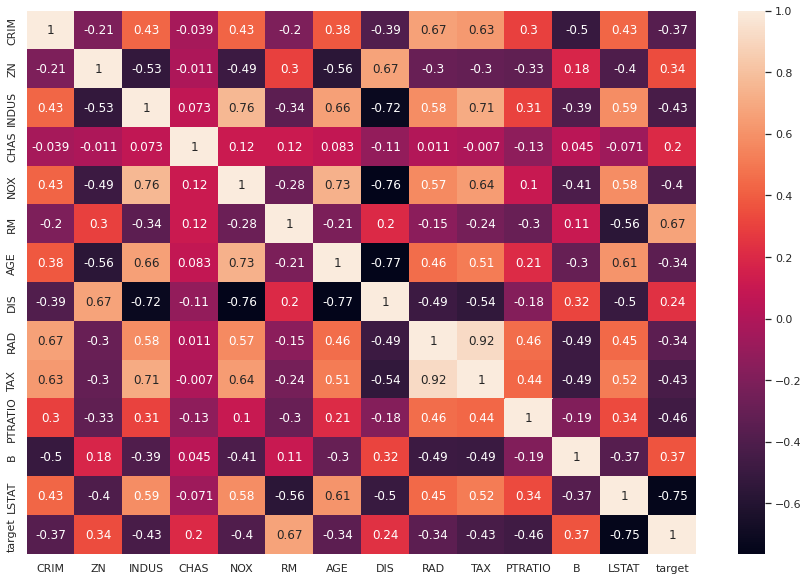

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc ={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()


In [44]:
selected_columns = ['CRIM', 'INDUS','NOX','RM','TAX','PTRATIO','LSTAT']

In [45]:
train_selected = traindf[selected_columns]
test_selected = testdf[selected_columns]
test_selected.head()

CRIM  INDUS     NOX     RM    TAX  PTRATIO  LSTAT
0   0.04819   3.64  0.3920  6.108  315.0     16.4   6.57
1  88.97620  18.10  0.6710  6.968  666.0     20.2  17.21
2   0.57834   3.97  0.5750  8.297  264.0     13.0   7.44
3   0.04741  11.93  0.5730  6.030  273.0     21.0   7.88
4   0.02009   2.68  0.4161  8.034  224.0     14.7   2.88

In [46]:
kmodel = LinearRegression()
kmodel.fit(train_selected, y_train)
kmodel.score(train_selected, y_train)

0.6888273691739654

In [47]:
kmodel.score(test_selected,y_test)



0.6532602143212094

# 11**. Conclusion**
When we use linear regression, there is over-fitting. In order to remove the overfitting, we used regularization. Under regularization, we used the ridge and lasso technique. In order to increase the accuracy, we applied the polynominal feature to degree 2. To remove further overfitting, we applied the ridge and lasso. Since the accuracy has not changed much, we performed selectkbest to get a high accuracy.